In [1]:
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

#generate dataset of 100 samples, with noise 0.25 and random state 2
X, y = make_circles(n_samples = 100, noise = 0.1, random_state=42)

<Axes: >

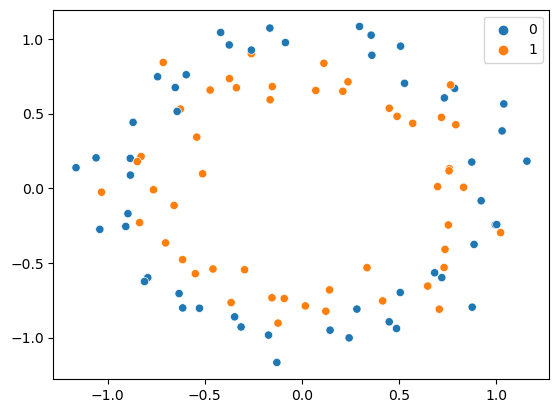

In [10]:
import matplotlib.pyplot as plt

#Use scatter function to plot your dataset
sns.scatterplot(x=X[:,0], y=X[:,1],hue = y)

In [11]:
X.shape

(100, 2)

In [12]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# CNN model with hidden layer neuron 128 in first and second layer keep you model name as model1 
model1 = Sequential([
    #input layers
    Dense(128, activation='relu',input_shape=(2,)),
    Dense(128, activation='relu'),
    #output layer
    Dense(1, activation='softmax')
])

# Compile the model
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compilr the model keeping learning rate 0.01 and train it with 500 epochs validation split 20% verbose 0
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


9600/9600 [==============================] - 7s 703us/step


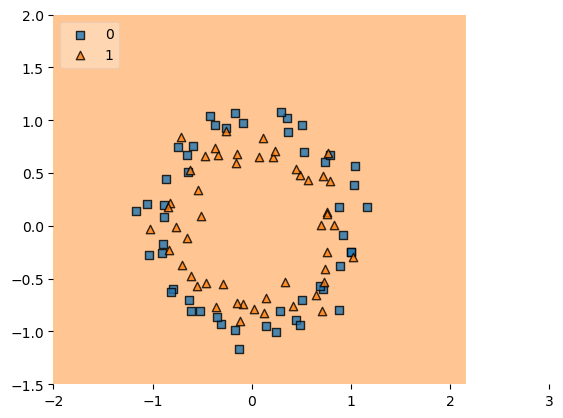

In [27]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [31]:
history1 = model1.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 500, verbose = 0)

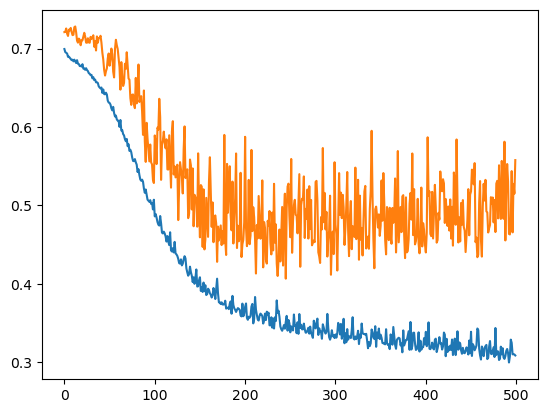

In [32]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [35]:
#Copy you nn model here but this time you have to add the rgulizers l2 with value on your choice
# you can take help from the link https://keras.io/api/layers/core_layers/dense/
#Keep Your model name as model 2
from keras import regularizers
model2 = Sequential([
    #input layers
    Dense(128, activation='relu',input_shape=(2,),kernel_regularizer=regularizers.L1(0.01)),
    Dense(128, activation='relu'),
    #output layer
    Dense(1, activation='softmax')
])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               384       
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compilr the model keeping learning rate 0.01 and train it with 2000 epochs validation split 20% verbose 0
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

9600/9600 [==============================] - 7s 720us/step


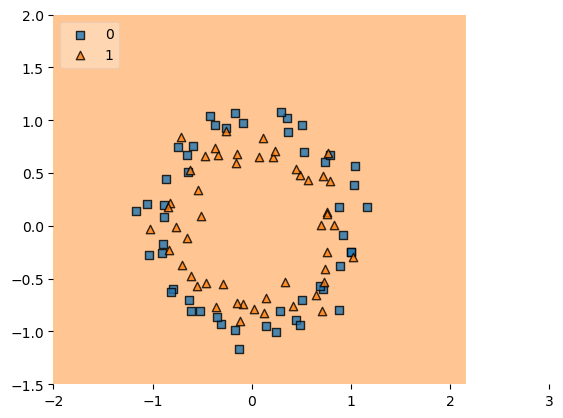

In [37]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [39]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 500, verbose = 0)

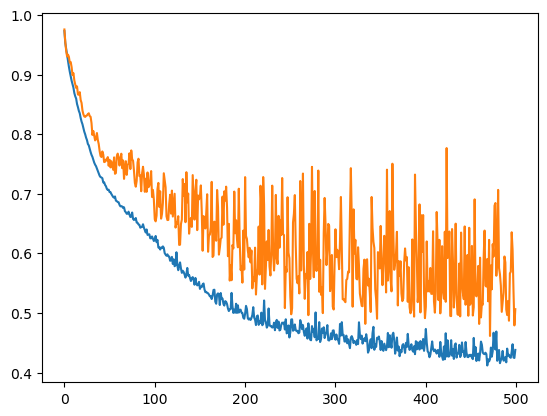

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [54]:
#You can compare the weight of first layer of both model print that and observe the weight values
model1_weight_layer1 = model1.get_weights()[0]
model2_weight_layer1 = model2.get_weights()[0]


In [55]:
model1_weight_layer1.shape

(2, 128)

In [56]:
min_value_model1 = model1_weight_layer1.min()
min_value_model2 = model2_weight_layer1.min()

# Print the minimum values
print("Min Value in Model 1:", min_value_model1)
print("Min Value in Model 2:", min_value_model2)


Min Value in Model 1: -0.31719825
Min Value in Model 2: -0.1701563


C:\Users\PC-04\AppData\Local\Temp\ipykernel_4004\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\PC-04\AppData\Local\Temp\ipykernel_4004\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

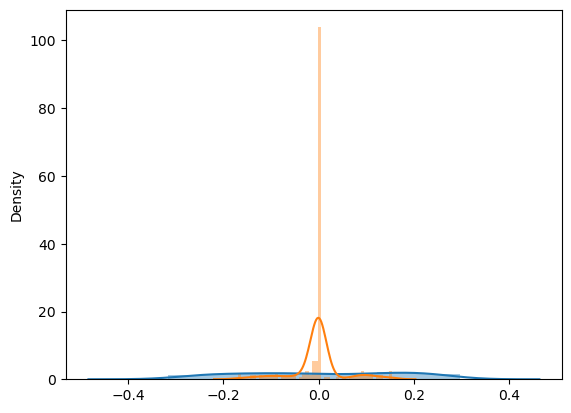

In [57]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [62]:
#Reshpe your first layer weights
model1_weight_layer1 = np.reshape(model1_weight_layer1, (32,-1))
model1_weight_layer1.shape

(32, 8)